In [2]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# 윈도우용 폰트 경로 설정
path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

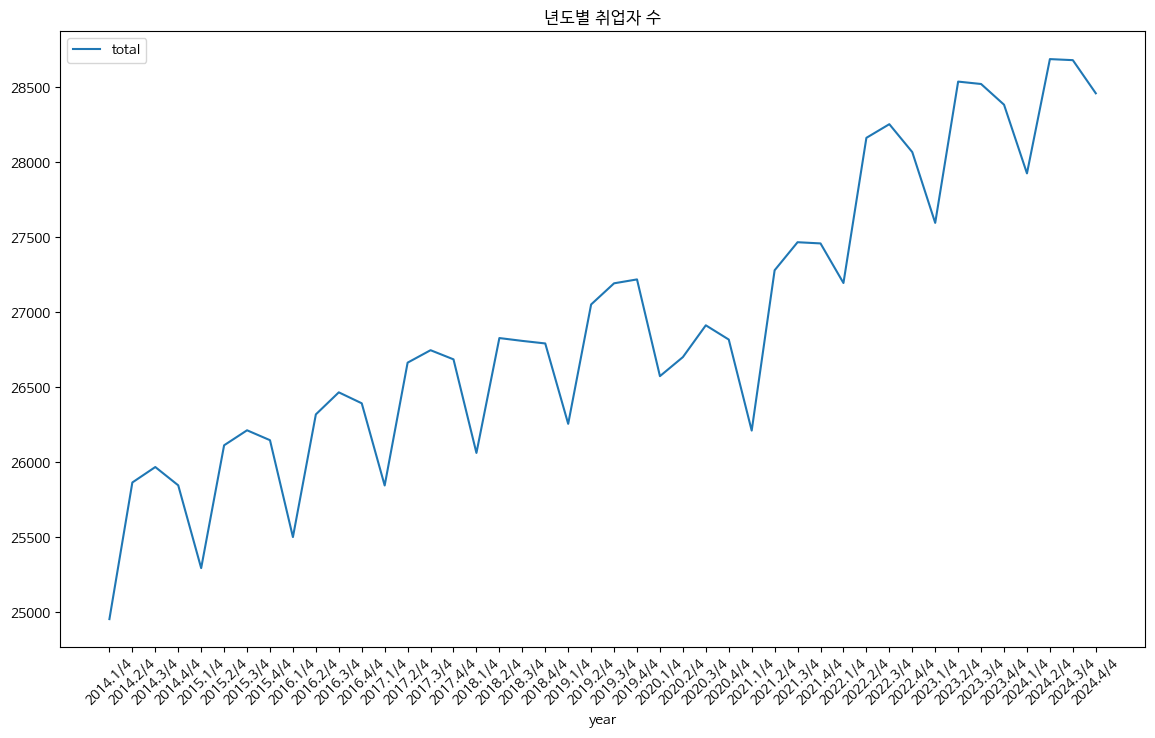

In [5]:
file_path = "./ref/행정구역시도성연령별취업자20250304.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")

ex_data = ori.copy() #복사
ex_data.columns = ['resion','year','age','gender','value'] #컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시

ex_data['value'] = ex_data['value'].astype(int) 
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

ax = ex1_data.plot(x='year',y='total',figsize=(14,8),title='년도별 취업자 수')
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

- 취업률은 시간이 지날수록 점점 올라가는 추세이다.

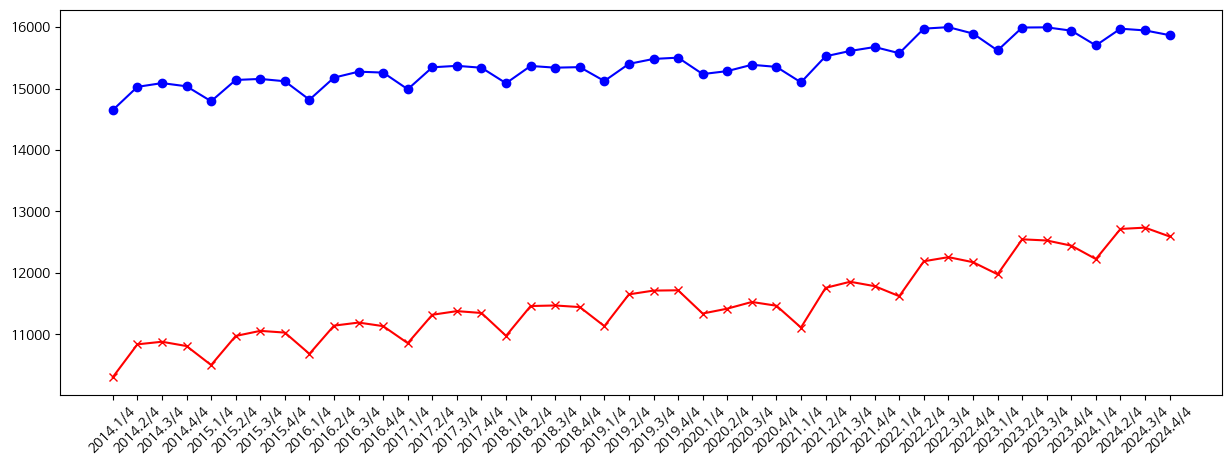

In [6]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시

ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')

filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color='blue',linestyle='-',marker='o')
plt.plot(female['year'],female['total'],label='여자',color='red',linestyle='-',marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

- 취업률은 남성이 훨씬 높은 것을 확인할 수 있다.
- 남녀 모두 매해 4분기에는 감소했다가 다음 해 1분기에 다시 오르는것을 반복하고 있고 전체적으로 봤을때는 점차 취업률이 오르고 있는 것으로 볼 수 있다.

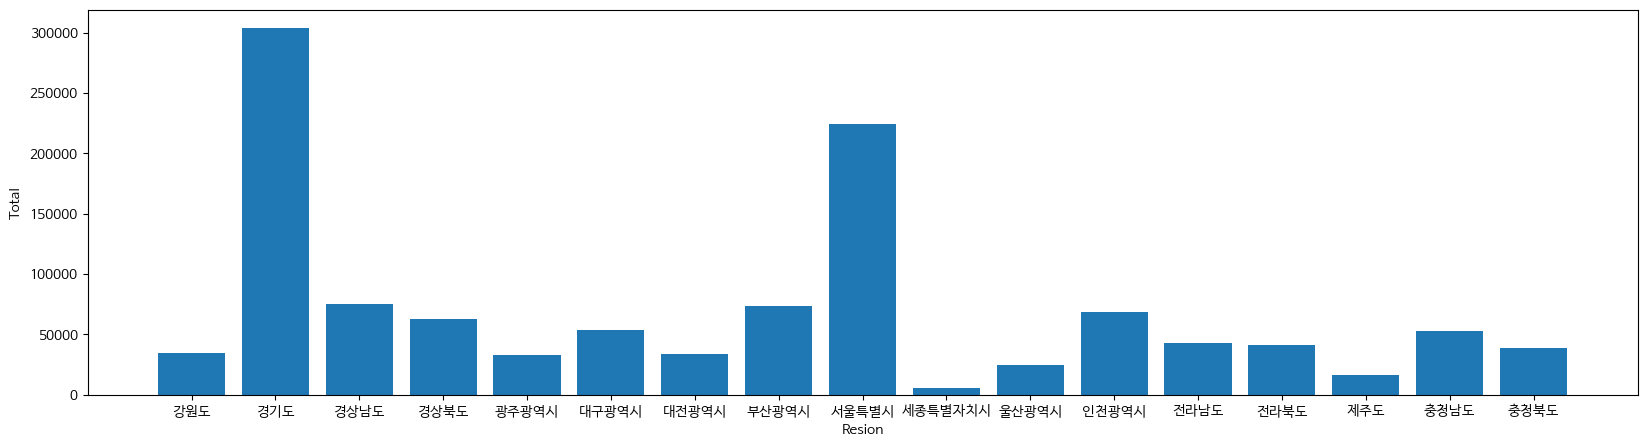

In [7]:
ex3_data = ori.copy() # 복사
ex3_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex3_data.loc[ex3_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시

ex3_data['value'] = ex3_data['value'].astype(int)
res = ex3_data.groupby(['resion'])['value'].sum().reset_index(name='total')
res = pd.DataFrame(res)

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(res['resion'],res['total'])
ax.set_xlabel('Resion')
ax.set_ylabel('Total')
plt.show()

- 수도권의 취업율이 압도적으로 높은 것을 알 수 있다.
- 전라북도, 제주도 등의 지역은 상대적으로 낮은 취업률을 보임.
- 비수도권은 산업 구조에 따라 취업률 차이가 크며, 특히 전라북도, 강원도, 제주도 등의 취업률이 낮음.
- 취업률이 수도권에 집중되어있어 지방의 취업기회 확대가 필요한 것으로 보인다.
- 지방의 취업 기회를 늘리기 위한 지원과 변화가 필요하다.